In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:

l = 1
g = 9.81
m = 0.1


dt = 0.005
n_steps = 20000




t_old = 0
t_new = 0


theta_old = 60*(np.pi/180)
theta_dot_old = 0
theta_dot_dot_old = -(g/l)*np.sin(theta_old)


def euler_method(dt=0.005, n_steps=20000, initial_theta_degrees=20, l=1,m=0.1):
    theta_old = initial_theta_degrees*(np.pi/180)

    pos_x = np.zeros(n_steps+1)
    pos_y = np.zeros(n_steps+1)
    times = np.zeros(n_steps+1)
    thetas = np.zeros(n_steps+1)

    pos_x[0] = np.sin(theta_old)*l
    pos_y[0] = -np.cos(theta_old)*l
    times[0] = 0
    thetas[0] = theta_old


    t_old = 0
    t_new = 0


    
    theta_dot_old = 0
    theta_dot_dot_old = -(g/l)*np.sin(theta_old)


    for i in range(n_steps):
        t_new += dt

        theta_dot_dot_old = -(g/l)*np.sin(theta_old)
        
        theta_new = theta_old + theta_dot_old*dt
        theta_dot_new = theta_dot_old + theta_dot_dot_old*dt

        ### write out
        pos_x[i+1] = np.sin(theta_new)*l
        pos_y[i+1] = -np.cos(theta_new)*l
        times[i+1] = times[i]+dt
        thetas[i+1] = theta_new

        ###

        theta_old = theta_new
        theta_dot_old = theta_dot_new
        
    return pos_x, pos_y, times, thetas



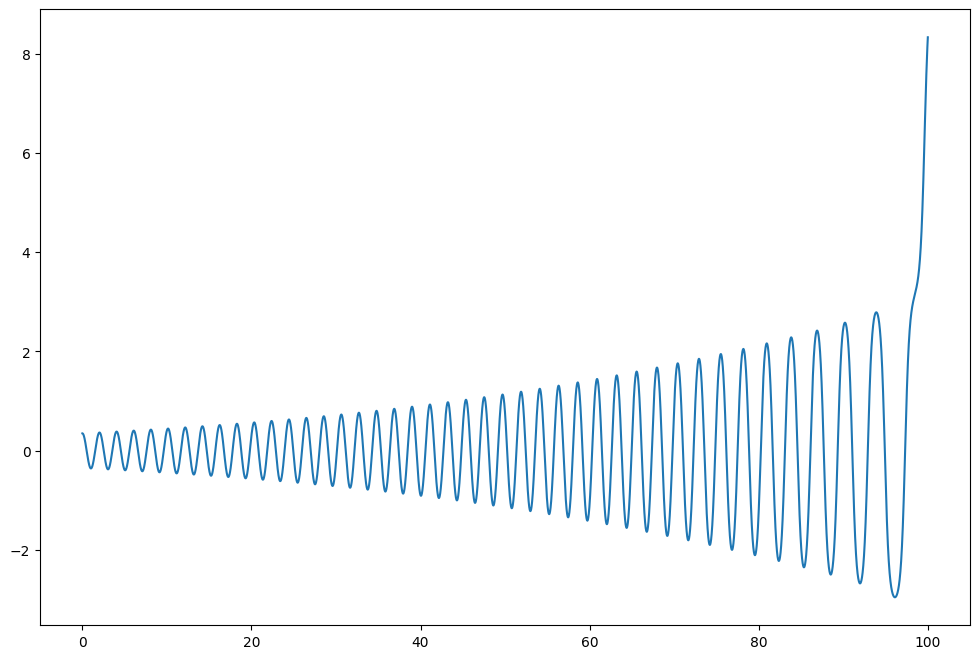

In [17]:
euler_x, euler_y, euler_times, euler_thetas  = euler_method()

plt.figure(figsize=(12,8))
plt.plot(euler_times, euler_thetas)

## well ... this is a sigma problem
i know!
we use the runge-kutte method for epicness!

how does it work you ask?

well like a bomb ! .... a 4th order bomb!

$$\theta(t_0 + h) = \theta(t_0) + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6}h  = \theta(t_0) + (\frac{1}{6}k_1 + \frac{1}{3}k_2 + \frac{1}{3}k_3 + \frac{1}{6}k_4)\Delta t$$

What is k you may ask? well it is the 'slope' or derivative at different time steps:

$$k_1 = f(y(t_0)) $$
$$k_2 = f(y(t_0) + k_1 h/2)$$
$$k_1 = f(y(t_0) + k_2 h/2) $$
$$k_1 = f(y(t_0))  + k_3 h$$

Where $f(y(t_0))$ means $\frac{d}{dt} y(t_0)$

In [18]:
## RK4 code:
dt = 0.005
n_steps = 20000


def rk4_method(dt=0.005, n_steps=20000, initial_theta_degrees=60, l=1,m=0.1):
    theta_old = initial_theta_degrees*(np.pi/180)

    theta_dot_old = 0
    theta_dot_dot_old = -(g/l)*np.sin(theta_old)

    pos_x = np.zeros(n_steps+1)
    pos_y = np.zeros(n_steps+1)
    times = np.zeros(n_steps+1)
    thetas = np.zeros(n_steps+1)
    theta_dots = np.zeros(n_steps+1)

    pos_x[0] = np.sin(theta_old)*l
    pos_y[0] = -np.cos(theta_old)*l
    times[0] = 0
    thetas[0] = theta_old
    

    t_old = 0
    t_new = 0
    for i in range(n_steps):
        t_new += dt


        k1_theta = theta_dot_old
        k1_theta_dot = -(g/l)*np.sin(theta_old)

        k2_theta = theta_dot_old + k1_theta_dot*dt/2
        k2_theta_dot = -(g/l)*np.sin(theta_old + k1_theta*dt/2)

        k3_theta = theta_dot_old + k2_theta_dot*dt/2
        k3_theta_dot = -(g/l)*np.sin(theta_old + k2_theta*dt/2)


        k4_theta = theta_dot_old + k3_theta_dot*dt
        k4_theta_dot =  -(g/l)*np.sin(theta_old + k3_theta*dt)

        theta_new = theta_old + dt * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)/6 
        theta_dot_new = theta_dot_old + dt * (k1_theta_dot + 2*k2_theta_dot + 2*k3_theta_dot + k4_theta_dot)/6 


        ### write out
        pos_x[i+1] = np.sin(theta_new)*l
        pos_y[i+1] = -np.cos(theta_new)*l
        times[i+1] = times[i]+dt
        thetas[i+1] = theta_new
        theta_dots[i+1] = theta_dot_new
        ###

        theta_old = theta_new
        theta_dot_old = theta_dot_new
        
    return pos_x, pos_y, times, thetas, theta_dots





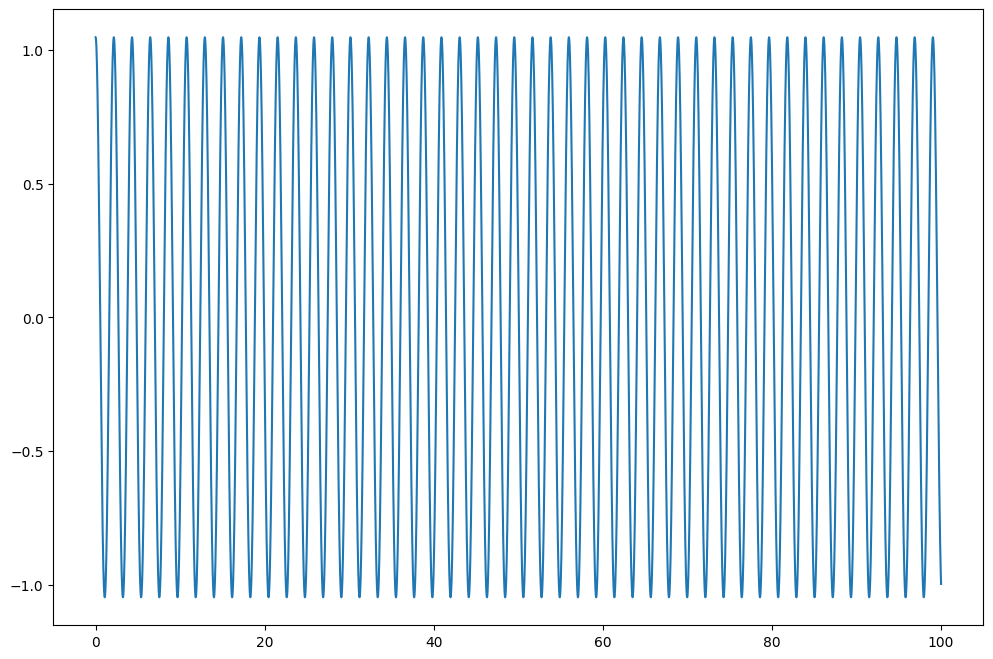

In [19]:
rk4_x, rk4_y, rk4_times, rk4_thetas, rk4_theta_dots = rk4_method()

plt.figure(figsize=(12,8))
plt.plot(rk4_times, rk4_thetas)

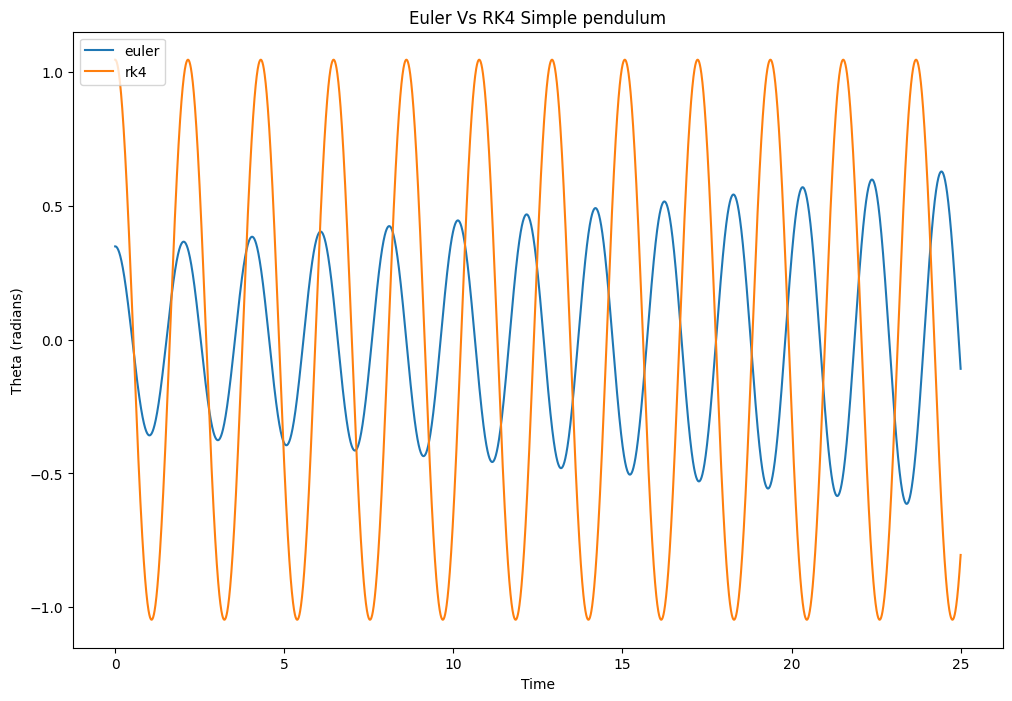

In [20]:
euler_x, euler_y, euler_times, euler_thetas  = euler_method(dt=0.005, n_steps=5000)
rk4_x, rk4_y, rk4_times, rk4_thetas,rk4_theta_dots = rk4_method(dt=0.005, n_steps=5000)


plt.figure(figsize=(12,8))
plt.plot(euler_times, euler_thetas, label='euler')
plt.plot(rk4_times, rk4_thetas, label='rk4')
plt.xlabel('Time')
plt.ylabel("Theta (radians)")
plt.title('Euler Vs RK4 Simple pendulum')
plt.legend()

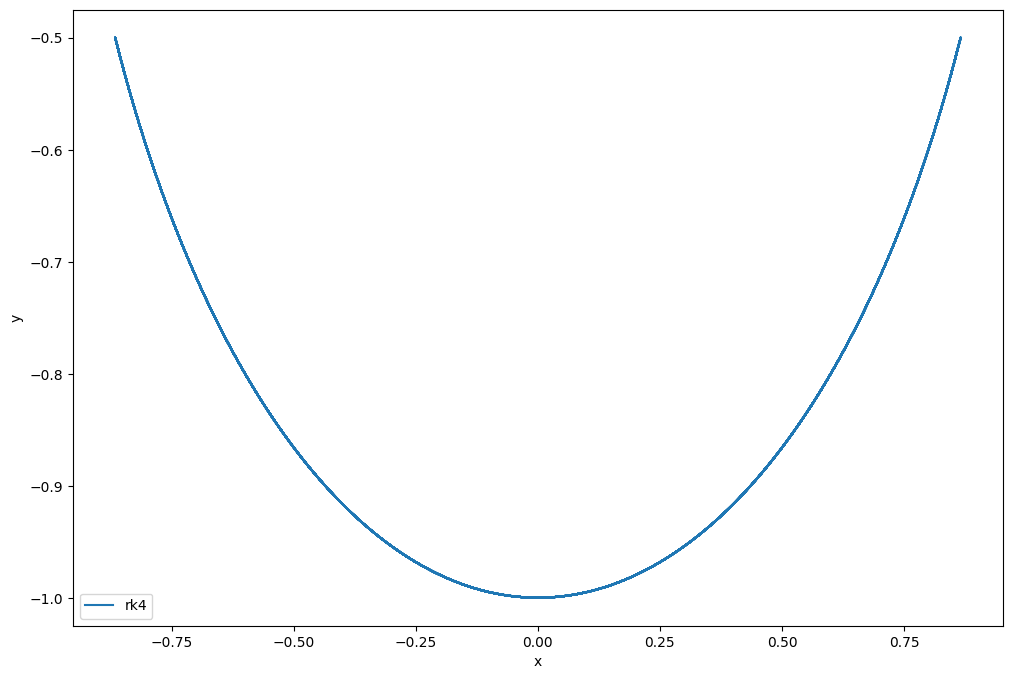

In [21]:
euler_x, euler_y, euler_times, euler_thetas  = euler_method(dt=0.005, n_steps=5000)
rk4_x, rk4_y, rk4_times, rk4_thetas, rk4_theta_dots = rk4_method(dt=0.005, n_steps=5000)


plt.figure(figsize=(12,8))
plt.plot(rk4_x, rk4_y, label='rk4')

#plt.plot(rk4_times, rk4_thetas, label='rk4')
plt.xlabel('x')
plt.ylabel("y")
#plt.title('Euler Vs RK4 Simple pendulum')
plt.legend()

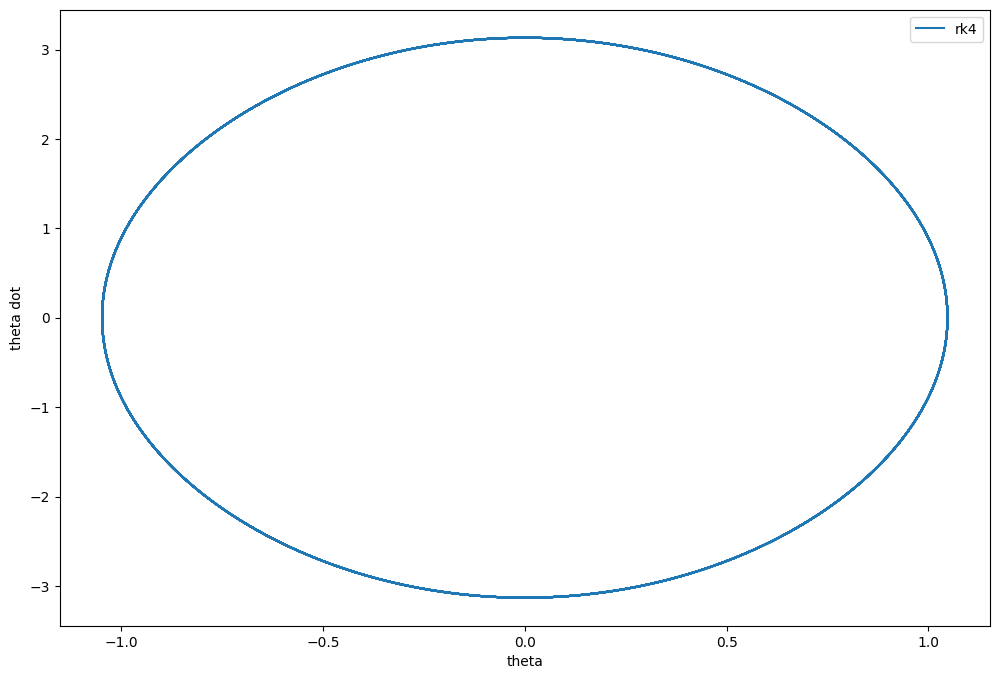

In [22]:
rk4_x, rk4_y, rk4_times, rk4_thetas, rk4_theta_dots = rk4_method(dt=0.005, n_steps=5000)


plt.figure(figsize=(12,8))
plt.plot(rk4_thetas, rk4_theta_dots, label='rk4')

#plt.plot(rk4_times, rk4_thetas, label='rk4')
plt.xlabel('theta')
plt.ylabel("theta dot")
#plt.title('Euler Vs RK4 Simple pendulum')
plt.legend()

In [24]:
rk4_times[-1], rk4_x[-1], rk4_y[-1], rk4_y[-1]+5

(24.99999999999931,
 -0.7207768837610025,
 -0.6931671398990134,
 4.306832860100987)

In [14]:
rk4_y[-1]+5

4.027489091852394

Text(0.5, 1.0, 'Energy Conservation Check')

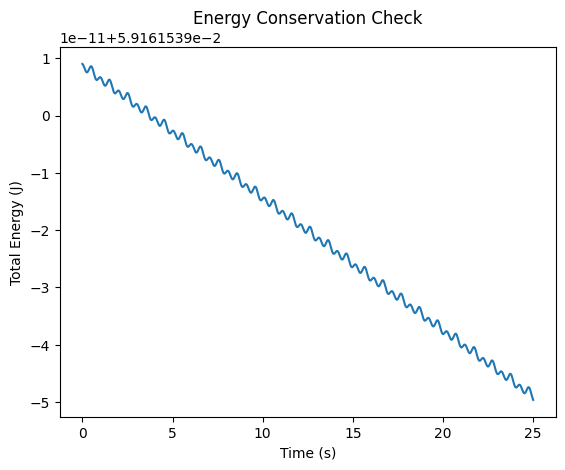

In [9]:
# Calculate total energy at each step
KE = 0.5*m*l**2*rk4_theta_dots**2  # Kinetic
PE = m*g*l*(1 - np.cos(rk4_thetas))  # Potential
E_total = KE + PE

plt.plot(rk4_times, E_total)
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (J)')
plt.title('Energy Conservation Check')

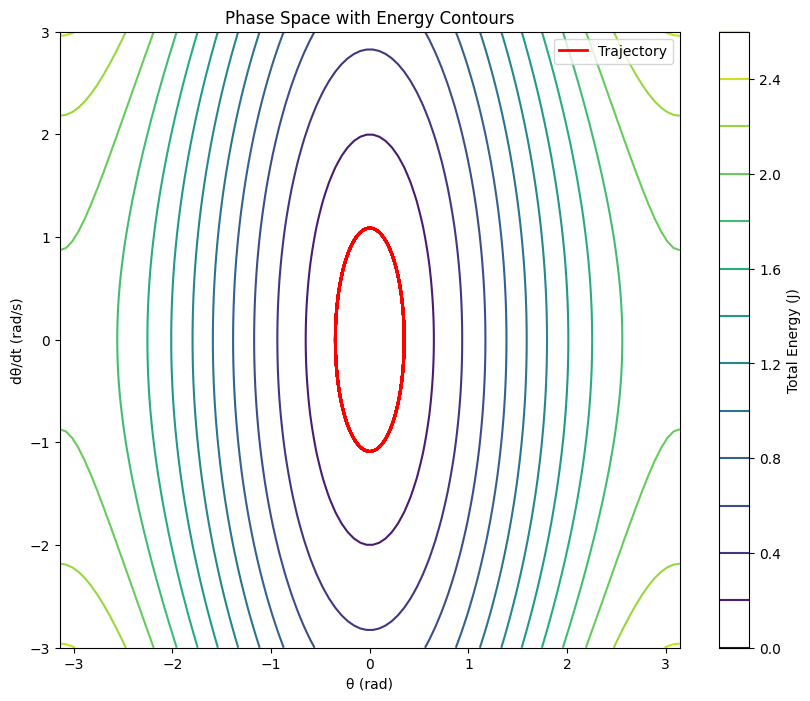

In [10]:
# Create a grid of theta and theta_dot values
theta_grid = np.linspace(-np.pi, np.pi, 100)
theta_dot_grid = np.linspace(-3, 3, 100)
Theta, Theta_dot = np.meshgrid(theta_grid, theta_dot_grid)

# Calculate energy at each point
KE = 0.5*m*l**2*Theta_dot**2
PE = m*g*l*(1 - np.cos(Theta))
E_total = KE + PE

# Plot energy contours
plt.figure(figsize=(10,8))
contours = plt.contour(Theta, Theta_dot, E_total, levels=15, cmap='viridis')
plt.colorbar(contours, label='Total Energy (J)')

# Overlay your actual trajectory
plt.plot(rk4_thetas, rk4_theta_dots, 'r-', linewidth=2, label='Trajectory')

plt.xlabel('θ (rad)')
plt.ylabel('dθ/dt (rad/s)')
plt.title('Phase Space with Energy Contours')
plt.legend()

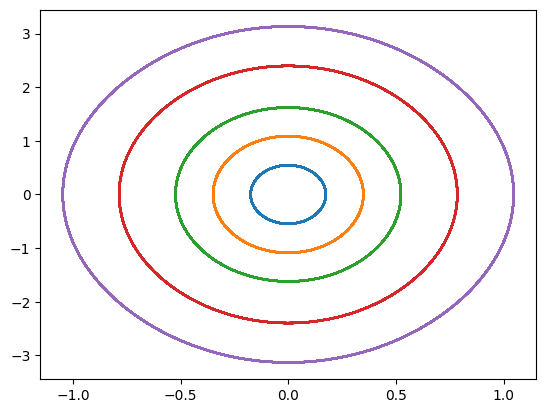

In [34]:
for theta_init in [10, 20, 30, 45, 60]:
    _, _, _, thetas, theta_dots = rk4_method(initial_theta_degrees=theta_init)
    plt.plot(thetas, theta_dots, label=f'{theta_init}°')

## jsut differnet inital conditions

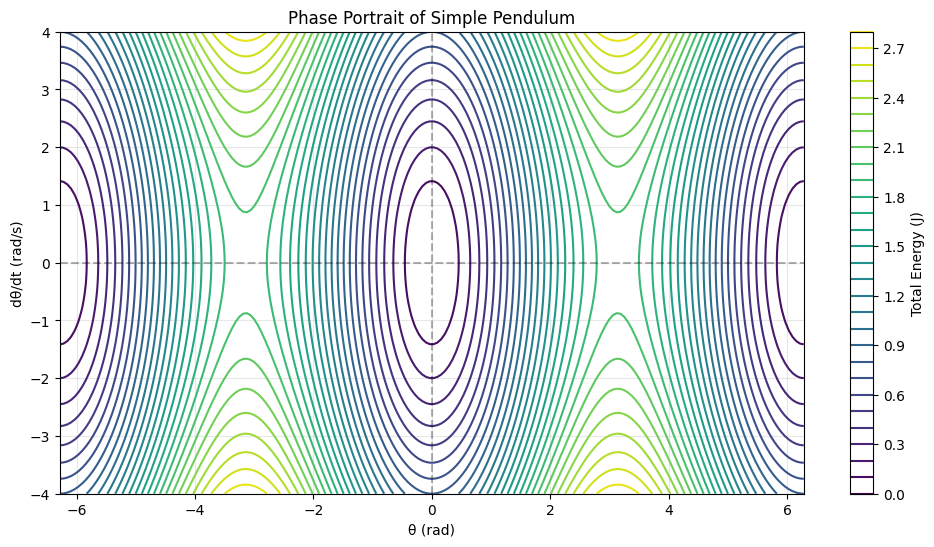

In [35]:
# Create a finer grid
theta_grid = np.linspace(-2*np.pi, 2*np.pi, 200)
theta_dot_grid = np.linspace(-4, 4, 200)
Theta, Theta_dot = np.meshgrid(theta_grid, theta_dot_grid)

# Calculate energy at each point
KE = 0.5*m*l**2*Theta_dot**2
PE = m*g*l*(1 - np.cos(Theta))
E_total = KE + PE

# Plot phase portrait
plt.figure(figsize=(12,6))

# Use more contour levels to see the "eyes"
contours = plt.contour(Theta, Theta_dot, E_total, levels=30, cmap='viridis')
plt.colorbar(contours, label='Total Energy (J)')

plt.xlabel('θ (rad)')
plt.ylabel('dθ/dt (rad/s)')
plt.title('Phase Portrait of Simple Pendulum')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)

In [68]:
def small_angle_approx(theta=60, L=1, t=7.5,wall_h=5, g=9.81):

    omega = np.sqrt(g/L)
    return wall_h-L*np.cos(np.deg2rad(theta)*np.cos(omega*t))

In [69]:
small_angle_approx()

4.002777952032734

In [72]:
import numpy as np

def rk4_pendulum_height(theta_deg=60.0, L=1.0, t_end=7.5, ceiling_h=5.0, g=9.81, dt=1e-3):
    # State: [theta, omega]; theta in radians, omega in rad/s
    theta = np.deg2rad(theta_deg)
    omega = 0.0  # released from rest

    def f_theta(theta, omega):  # dtheta/dt
        return omega
    def f_omega(theta, omega):  # domega/dt
        return -(g/L)*np.sin(theta)

    t = 0.0
    steps = int(t_end/dt)
    for _ in range(steps):
        k1_theta, k1_omega = f_theta(theta, omega), f_omega(theta, omega)
        k2_theta, k2_omega = f_theta(theta + 0.5*dt*k1_theta, omega + 0.5*dt*k1_omega), f_omega(theta + 0.5*dt*k1_theta, omega + 0.5*dt*k1_omega)
        k3_theta, k3_omega = f_theta(theta + 0.5*dt*k2_theta, omega + 0.5*dt*k2_omega), f_omega(theta + 0.5*dt*k2_theta, omega + 0.5*dt*k2_omega)
        k4_theta, k4_omega = f_theta(theta + dt*k3_theta, omega + dt*k3_omega), f_omega(theta + dt*k3_theta, omega + dt*k3_omega)

        theta += (dt/6)*(k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
        omega += (dt/6)*(k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)
        t += dt

    height = ceiling_h - L*np.cos(theta)
    return height, theta, omega
rk4_pendulum_height()

(4.495486829739929, -1.0419783037217583, -0.2975708327471496)

In [129]:
# import numpy as np

def small_angle_height(theta_deg=40, L=1.0, t=18.5, ceiling_h=5.0, g=9.81):
    theta0 = np.deg2rad(theta_deg)              # degrees -> radians
    omega = np.sqrt(g / L)                      # natural frequency
    theta_t = theta0 * np.cos(omega * t)        # small-angle solution
    h = ceiling_h - L * np.cos(theta_t)         # height above ground
    return h
small_angle_height()

4.007441890828231

In [131]:


rk4_x, rk4_y, rk4_times, rk4_thetas, rk4_theta_dots = rk4_method(dt=0.005, n_steps=3700, initial_theta_degrees=40, l=1,m=0.1)
rk4_times[-1], rk4_y[-1]+5

(18.500000000000604, 4.205621948155253)

In [130]:
18.5/.005

3700.0

In [95]:
2300*.005

11.5

h_RK4(t_end)   = 4.000001 m
h_small(t_end) = 4.195103 m
ratio          = 0.953493


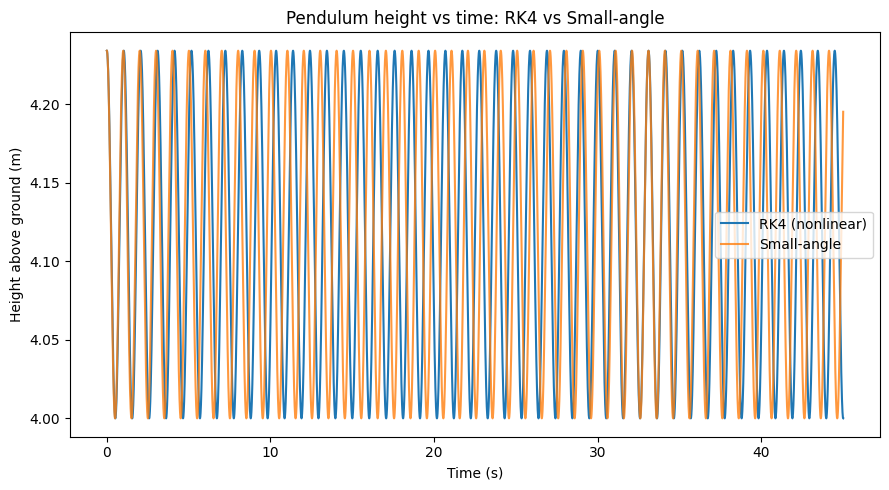

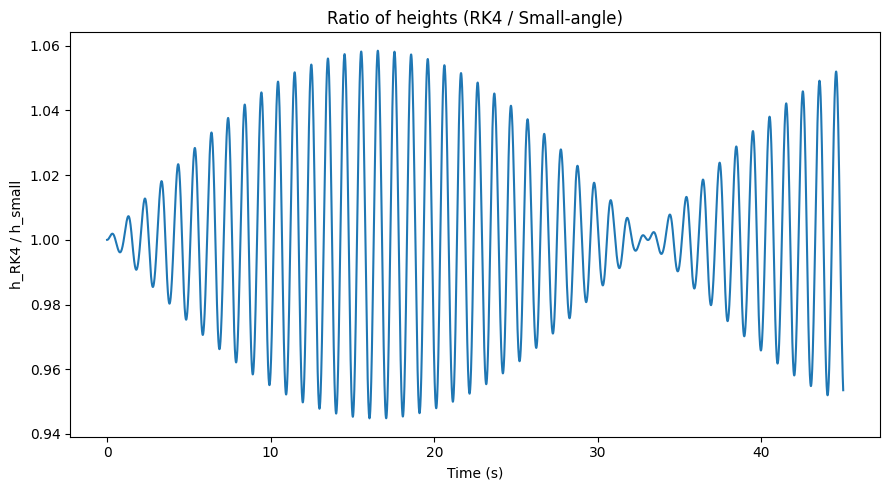

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Parameters (tweak as you like)
# ----------------------------
theta0_deg = 40.0   # initial angle, degrees
L = 1.0             # pendulum length (m)
g = 9.81            # gravity (m/s^2)
ceiling_h = 5.0     # ceiling height above ground (m)
t_end = 45.0        # simulate to this time (s)
dt = 1e-3           # time step for RK4 (s)

# ----------------------------
# Helpers
# ----------------------------
def rk4_pendulum(theta0_deg, L, g, t_end, dt):
    """
    Integrate the nonlinear pendulum:
        d2theta/dt2 + (g/L) * sin(theta) = 0
    with initial conditions theta(0)=theta0, dtheta/dt(0)=0.
    Returns t-array and theta(t) in radians.
    """
    theta = np.deg2rad(theta0_deg)
    omega = 0.0                 # released from rest
    n = int(np.round(t_end/dt)) + 1
    t = np.linspace(0.0, t_end, n)
    th = np.empty(n)
    th[0] = theta

    def f_theta(th, om):  # dtheta/dt
        return om

    def f_omega(th, om):  # domega/dt
        return -(g/L) * np.sin(th)

    for i in range(1, n):
        k1_th = f_theta(theta, omega)
        k1_om = f_omega(theta, omega)

        k2_th = f_theta(theta + 0.5*dt*k1_th, omega + 0.5*dt*k1_om)
        k2_om = f_omega(theta + 0.5*dt*k1_th, omega + 0.5*dt*k1_om)

        k3_th = f_theta(theta + 0.5*dt*k2_th, omega + 0.5*dt*k2_om)
        k3_om = f_omega(theta + 0.5*dt*k2_th, omega + 0.5*dt*k2_om)

        k4_th = f_theta(theta + dt*k3_th, omega + dt*k3_om)
        k4_om = f_omega(theta + dt*k3_th, omega + dt*k3_om)

        theta += (dt/6.0) * (k1_th + 2*k2_th + 2*k3_th + k4_th)
        omega += (dt/6.0) * (k1_om + 2*k2_om + 2*k3_om + k4_om)

        th[i] = theta

    return t, th

def small_angle_theta(theta0_deg, L, g, t):
    """Small-angle solution: theta(t) = theta0*cos(sqrt(g/L)*t)."""
    theta0 = np.deg2rad(theta0_deg)
    omega0 = np.sqrt(g / L)
    return theta0 * np.cos(omega0 * t)

def height_from_theta(theta, L, ceiling_h):
    """Height above ground = ceiling_h - L*cos(theta)."""
    return ceiling_h - L * np.cos(theta)

# ----------------------------
# Compute trajectories
# ----------------------------
t, theta_rk4 = rk4_pendulum(theta0_deg, L, g, t_end, dt)
theta_small = small_angle_theta(theta0_deg, L, g, t)

h_rk4 = height_from_theta(theta_rk4, L, ceiling_h)
h_small = height_from_theta(theta_small, L, ceiling_h)
ratio = h_rk4 / h_small

print(f"h_RK4(t_end)   = {h_rk4[-1]:.6f} m")
print(f"h_small(t_end) = {h_small[-1]:.6f} m")
print(f"ratio          = {ratio[-1]:.6f}")

# ----------------------------
# Plots
# ----------------------------
plt.figure(figsize=(9,5))
plt.plot(t, h_rk4, label="RK4 (nonlinear)")
plt.plot(t, h_small, label="Small-angle", alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Height above ground (m)")
plt.title("Pendulum height vs time: RK4 vs Small-angle")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,5))
plt.plot(t, ratio)
plt.xlabel("Time (s)")
plt.ylabel("h_RK4 / h_small")
plt.title("Ratio of heights (RK4 / Small-angle)")
plt.tight_layout()
plt.show()


In [116]:
# Max ratio and its time
idx_max = np.nanargmax(ratio)   # first occurrence if there are ties
print(f"max ratio = {ratio[idx_max]:.6f} at t = {t[idx_max]:.6f} s")


max ratio = 1.058488 at t = 16.551000 s


In [75]:
ratio

array([1.        , 1.00000017, 1.00000068, ..., 0.963385  , 0.96292817,
       0.96247267])